In [34]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_stata("data/GLAD/GladWithRejion_030323_updated.dta")

In [36]:
# Remove NaN value from UCLA in GLAD:
df = df.dropna(subset=['ptb_4145', 'pt12_4145'])
print("GLAD shape:",df.shape)

GLAD shape: (30484, 1240)


In [37]:
print("Number of Nan Value in baseline:", df.ptb_4145.isna().sum())
print("Number of Nan Value in followup:", df.pt12_4145.isna().sum())

Number of Nan Value in baseline: 0
Number of Nan Value in followup: 0


In [38]:
df.ptb_4145.unique()

array([ 6.,  7.,  3.,  4.,  5., 10.,  8.,  9.,  2.,  1.])

#### Distribution of PTB_4145 and PT12_4145 and changes 

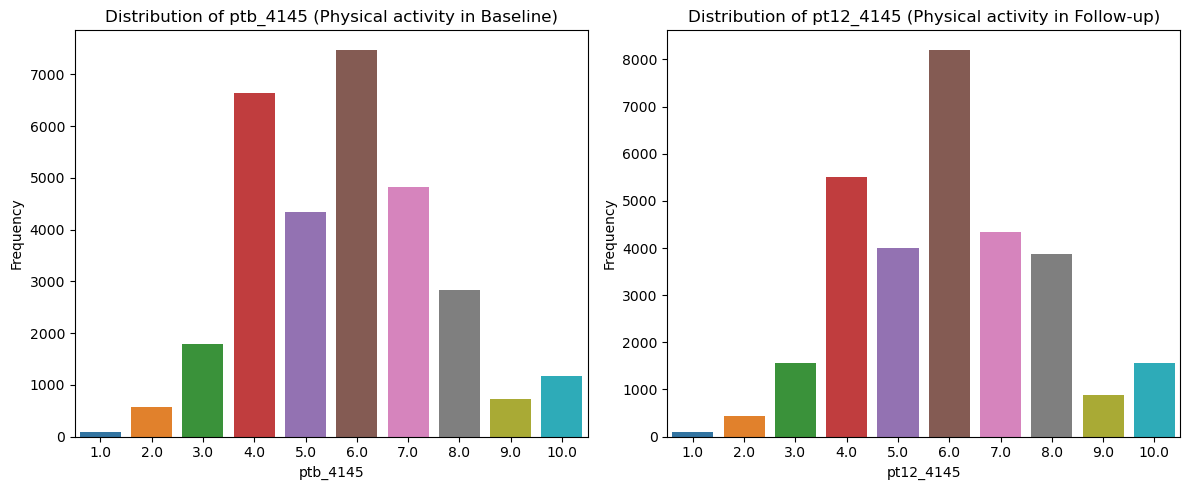

ptb_4145 Max: 10.0, Min: 1.0
pt12_4145 Max: 10.0, Min: 1.0
Shape of dataframe: (30484, 1240)


In [39]:
ptb_4145_counts = df['ptb_4145'].value_counts().reset_index()
ptb_4145_counts.columns = ['ptb_4145', 'count']

pt12_4145_counts = df['pt12_4145'].value_counts().reset_index()
pt12_4145_counts.columns = ['pt12_4145', 'count']

# Setting up the figure and axes for the subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar Plot for ptb_4145
sns.barplot(x='ptb_4145', y='count', data=ptb_4145_counts, ax=axes[0])  # Adjusting the plot to a bar plot
axes[0].set_title('Distribution of ptb_4145 (Physical activity in Baseline)')
axes[0].set_xlabel('ptb_4145')
axes[0].set_ylabel('Frequency')

# Bar Plot for pt12_4145
sns.barplot(x='pt12_4145', y='count', data=pt12_4145_counts, ax=axes[1])  # Adjusting the plot to a bar plot
axes[1].set_title('Distribution of pt12_4145 (Physical activity in Follow-up)')
axes[1].set_xlabel('pt12_4145')
axes[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

# Printing the max and min values for both ptb_4145 and pt12_4145
print(f"ptb_4145 Max: {df['ptb_4145'].max()}, Min: {df['ptb_4145'].min()}")
print(f"pt12_4145 Max: {df['pt12_4145'].max()}, Min: {df['pt12_4145'].min()}")
print(f"Shape of dataframe: {df.shape}")


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/2893461403.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['change'] = df['pt12_4145'] - df['ptb_4145']
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/2893461403.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['change_category'] = pd.cut(df['change'], bins=[float('-inf'), -0.01, 0.01, float('inf')],
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/2893461403.py:31: FutureWarning: Series.__getitem__ treating keys as po

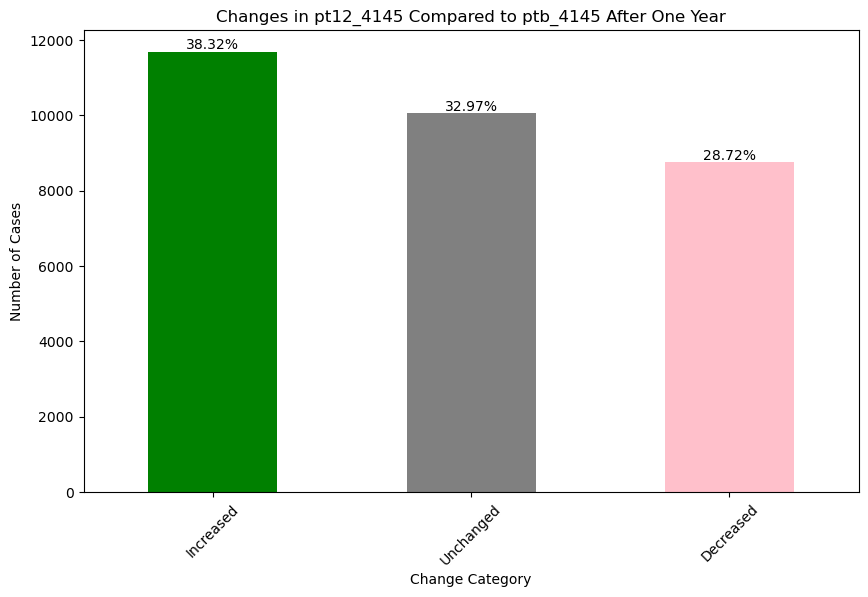

In [40]:
# Calculate the difference
df['change'] = df['pt12_4145'] - df['ptb_4145']

# Categorize the changes
df['change_category'] = pd.cut(df['change'], bins=[float('-inf'), -0.01, 0.01, float('inf')],
                               labels=['Decreased', 'Unchanged', 'Increased'])

# Ensure the order: Increased, Unchanged, Decreased
order = ['Increased', 'Unchanged', 'Decreased']

# Count the number of cases in each category, reindex to ensure order
change_counts = df['change_category'].value_counts().reindex(order)

# Calculate percentages
total = change_counts.sum()
percentages = (change_counts / total * 100).round(2)

# Specify colors for each category
colors = ['green', 'grey', 'pink']

# Visualize the results with a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
change_counts.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Changes in pt12_4145 Compared to ptb_4145 After One Year')
ax.set_xlabel('Change Category')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=45)

# Annotate each bar with the percentage of cases
for i, value in enumerate(change_counts.values):
    ax.text(i, value, f'{percentages[i]}%', ha='center', va='bottom')

plt.show()


In [41]:
df.change_category.value_counts()

change_category
Increased    11680
Unchanged    10050
Decreased     8754
Name: count, dtype: int64

#### Jan suggested

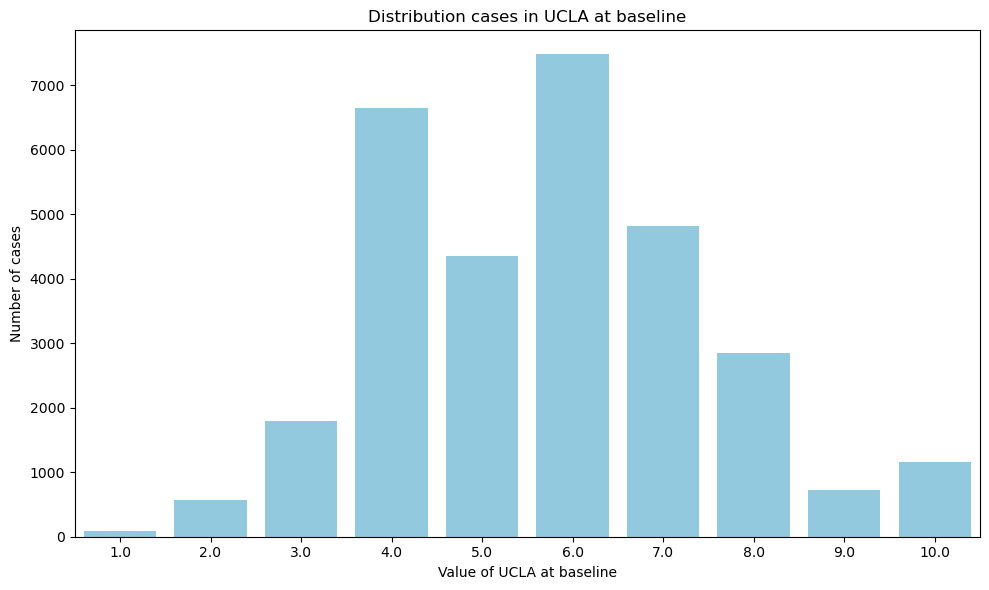

In [47]:
# Create the countplot with a specified color
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='ptb_4145', data=df, color='skyblue', ax=ax)

# Set the labels and title
plt.xlabel('Value of UCLA at baseline')
plt.ylabel('Number of cases')
plt.title('Distribution cases in UCLA at baseline')

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
df['ptb_4145'].value_counts(normalize=True)

ptb_4145
6.0     0.245276
4.0     0.217950
7.0     0.158280
5.0     0.142599
8.0     0.093196
3.0     0.058949
10.0    0.038151
9.0     0.023685
2.0     0.018830
1.0     0.003084
Name: proportion, dtype: float64

In [ ]:
###### Dividet Glad to 10 part based on the unique value:
df['ptb_4145'].value_counts(normalize=True) * 100

ptb_4145
6.0     24.527621
4.0     21.795040
7.0     15.827975
5.0     14.259940
8.0      9.319643
3.0      5.894896
10.0     3.815116
9.0      2.368456
2.0      1.882955
1.0      0.308358
Name: proportion, dtype: float64

In [ ]:
########
# 6:24
# 4:22
# 7:16
# 5:14
# 8:9
# 3:6
# 10:4
# 9:2
# 2:2
# 1:1

#######

#### Quintiling Variable Values

In [ ]:
######### If just cut to 5 quintiles
# # Define the bins for 'pd.cut'. Since the values are 1-10, we create bins that cut these into 5 equal parts.
# bins = np.linspace(0.5, 10.5, num=6)  # 0.5 added to make sure the bins cover the integer values properly

# # Use pd.cut to segment 'ptb_4145' into the bins
# df['ptb_4145_quintiles'] = pd.cut(df['ptb_4145'], bins=bins, labels=False, include_lowest=True)

# # Print the actual bin edges
# print("Bin edges:", bins)

# # Count the number of cases in each bin
# bin_counts = df['ptb_4145_quintiles'].value_counts().sort_index()

# # Plotting the distribution of cases within the bins
# plt.figure(figsize=(10, 6))

# # Create labels for the bins
# labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

# plt.bar(labels, bin_counts, color='skyblue', align='center')
# plt.xlabel('Binned Ranges of PTB_4145')
# plt.ylabel('Number of Cases')
# plt.title('Distribution of Cases Across Binned Ranges of PTB_4145')
# plt.xticks(rotation=45)
# plt.show()

# # Count the number of cases in each bin
# bin_counts = df['ptb_4145_quintiles'].value_counts().sort_index()

# # Print the number of cases in each quintile
# print(bin_counts)

Quintile edges: [ 1.  4.  5.  6.  7. 10.]


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/1081580272.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ptb_4145_quintiles'], bins = pd.qcut(df['ptb_4145'], 5, labels=False, retbins=True, duplicates='drop')


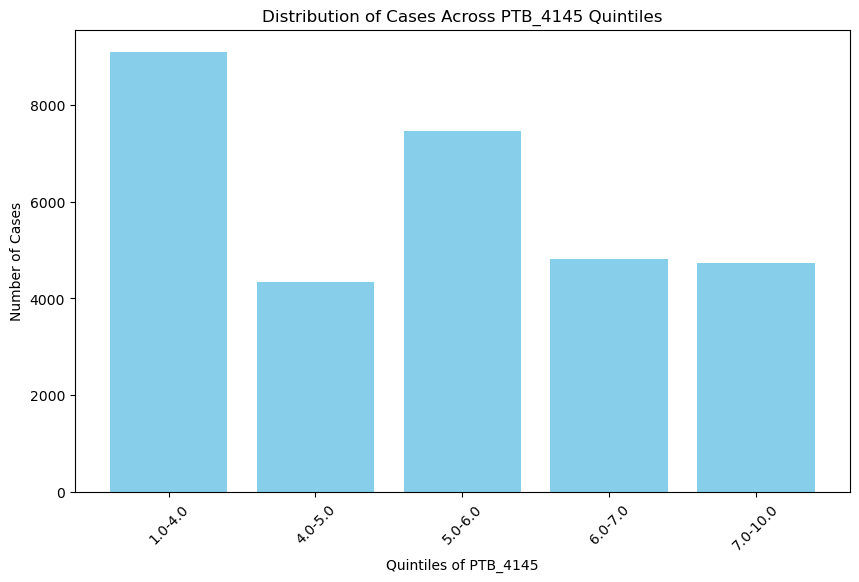

ptb_4145_quintiles
0    9109
1    4347
2    7477
3    4825
4    4726
Name: count, dtype: int64


In [ ]:
# Use pd.qcut to divide the data into quintiles
df['ptb_4145_quintiles'], bins = pd.qcut(df['ptb_4145'], 5, labels=False, retbins=True, duplicates='drop')

# The bins here represent the edges of the quintiles
print("Quintile edges:", bins)

# Count the number of cases in each quintile
quintile_counts = df['ptb_4145_quintiles'].value_counts().sort_index()

# Plotting the distribution of cases within the quintiles
plt.figure(figsize=(10, 6))

# Generate labels for each quintile based on the bin edges
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

plt.bar(labels, quintile_counts, color='skyblue', align='center')
plt.xlabel('Quintiles of PTB_4145')
plt.ylabel('Number of Cases')
plt.title('Distribution of Cases Across PTB_4145 Quintiles')
plt.xticks(rotation=45)
plt.show()


# Count the number of cases in each bin
bin_counts = df['ptb_4145_quintiles'].value_counts().sort_index()

# Print the number of cases in each quintile
print(bin_counts)


##### Increase / decrease

In [ ]:
# Calculate the change between the two time points
df['ptb_pt12_change'] = df['pt12_4145'] - df['ptb_4145']

# Categorize the changes
df['ptb_pt12_change_category'] = pd.cut(df['ptb_pt12_change'], bins=[-float('inf'), -1, 0, float('inf')], labels=['Decrease', 'No change', 'Increase'])

# Count the number of cases in each category
ptb_pt12_category_counts = df['ptb_pt12_change_category'].value_counts()

# Print the counts
print(ptb_pt12_category_counts)


ptb_pt12_change_category
Increase     11680
No change    10050
Decrease      8754
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/968104257.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ptb_pt12_change'] = df['pt12_4145'] - df['ptb_4145']
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/968104257.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ptb_pt12_change_category'] = pd.cut(df['ptb_pt12_change'], bins=[-float('inf'), -1, 0, float('inf')], labels=['Decrease', 'No change', 'Increase'])


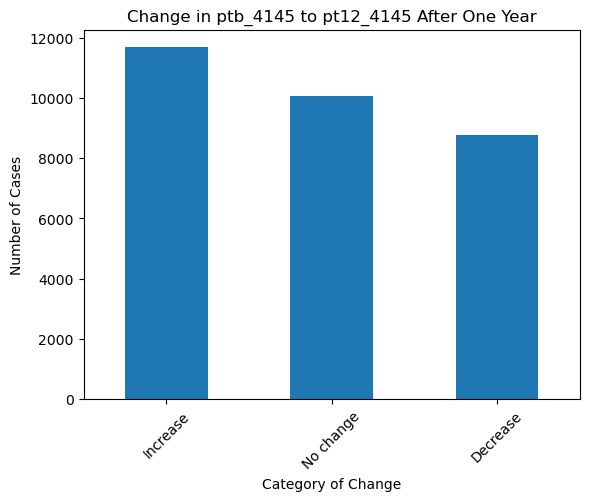

In [ ]:

# Calculate the change
df['ptb_pt12_change'] = df['pt12_4145'] - df['ptb_4145']

# Categorize the changes
df['ptb_pt12_change_category'] = pd.cut(df['ptb_pt12_change'], bins=[-float('inf'), -1, 0, float('inf')], labels=['Decrease', 'No change', 'Increase'])

# Count the number of cases in each category
ptb_pt12_category_counts = df['ptb_pt12_change_category'].value_counts()

# Plotting
ptb_pt12_category_counts.plot(kind='bar')
plt.title('Change in ptb_4145 to pt12_4145 After One Year')
plt.xlabel('Category of Change')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()


#### Tertiles based on the specified cut points (1,2,3,4 for tertile 1, 5,6 for tertile 2, and 7,8,9 for tertile 3 ): UCLA based on Linda's paper

##### Baseline

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/342512948.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['baseline_tertiles'] = df['ptb_4145'].apply(categorize_into_tertiles)


baseline_tertiles
High         9551
Low          9109
Moderate    11824
Name: count, dtype: int64


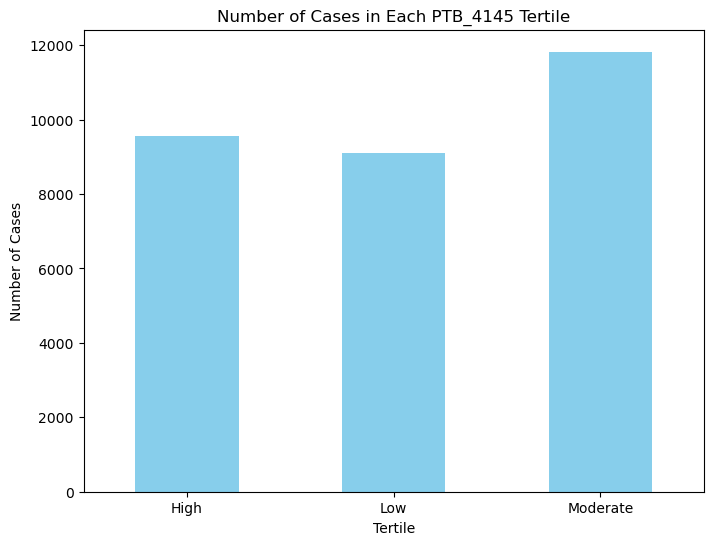

In [ ]:
# Function to categorize 'ptb_4145' scores into tertiles
def categorize_into_tertiles(value):
    if value in [1, 2, 3, 4]:
        return 'Low'
    elif value in [5, 6]:
        return 'Moderate'
    elif value in [7, 8, 9, 10]:
        return 'High'

# Apply the function to categorize each 'ptb_4145' score
df['baseline_tertiles'] = df['ptb_4145'].apply(categorize_into_tertiles)

# Verify the distribution across tertiles
tertile_distribution = df['baseline_tertiles'].value_counts().sort_index()
print(tertile_distribution)

# Plot the distribution of 'ptb_4145' scores across tertiles
plt.figure(figsize=(8, 6))
tertile_distribution.plot(kind='bar', color='skyblue')

plt.title('Number of Cases in Each PTB_4145 Tertile')
plt.xlabel('Tertile')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)

plt.show()

##### Follow-up

followup_tertiles
High        10652
Low          7615
Moderate    12217
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/2211398049.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['followup_tertiles'] = df['pt12_4145'].apply(categorize_into_tertiles)


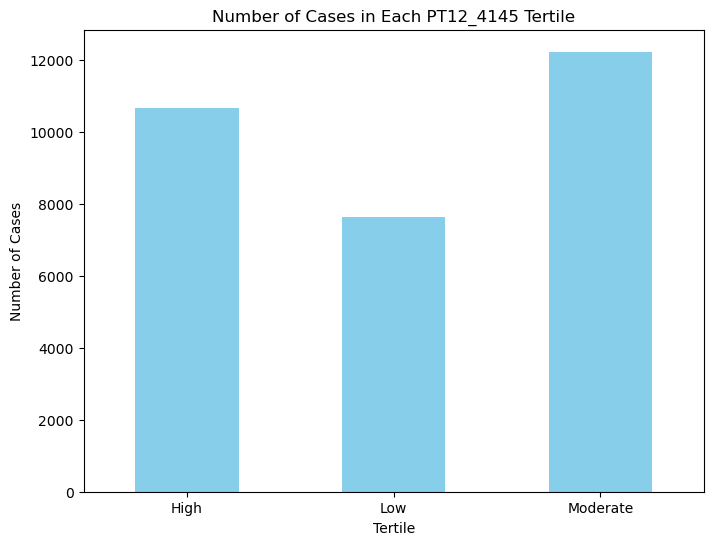

In [ ]:
###### Follow up 
# Function to categorize 'pt12_4145' scores into tertiles
def categorize_into_tertiles(value):
    if value in [1, 2, 3, 4]:
        return 'Low'
    elif value in [5, 6]:
        return 'Moderate'
    elif value in [7, 8, 9, 10]:
        return 'High'

# Apply the function to categorize each 'pt12_4145' score
df['followup_tertiles'] = df['pt12_4145'].apply(categorize_into_tertiles)

# Verify the distribution across tertiles
tertile_distribution = df['followup_tertiles'].value_counts().sort_index()
print(tertile_distribution)

# Plot the distribution of 'pt12_4145' scores across tertiles
plt.figure(figsize=(8, 6))
tertile_distribution.plot(kind='bar', color='skyblue')

plt.title('Number of Cases in Each PT12_4145 Tertile')
plt.xlabel('Tertile')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)

plt.show()

##### Increase/Decrease

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/4213255873.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['baseline_tertiles_codes'] = df['baseline_tertiles'].cat.codes
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/4213255873.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['followup_tertiles_codes'] = df['followup_tertiles'].cat.codes


Activity_Change
No Change    16835
Increased     7852
Decreased     5797
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/4213255873.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Activity_Change'] = df.apply(categorize_change, axis=1)


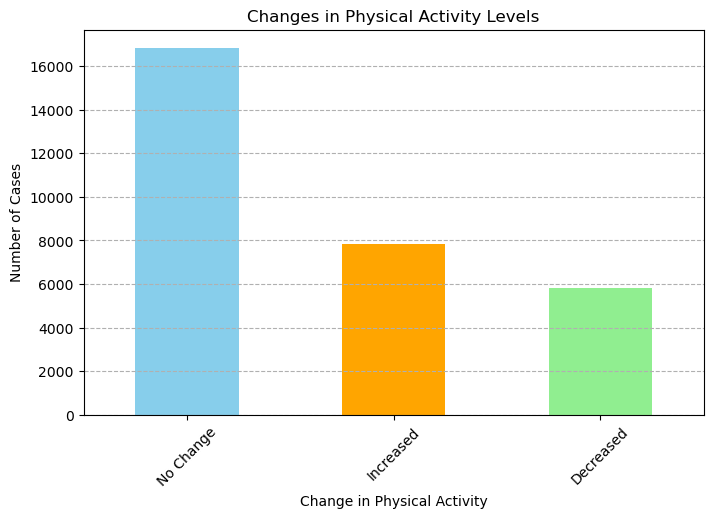

In [ ]:
# Define the order of the categories
categories = ['Low', 'Moderate', 'High']  # Adjusted to the new category labels
category_type = pd.CategoricalDtype(categories, ordered=True)

# Convert columns to categorical with the specified order
df['baseline_tertiles'] = pd.Categorical(df['baseline_tertiles'], categories=categories, ordered=True)
df['followup_tertiles'] = pd.Categorical(df['followup_tertiles'], categories=categories, ordered=True)

df['baseline_tertiles_codes'] = df['baseline_tertiles'].cat.codes
df['followup_tertiles_codes'] = df['followup_tertiles'].cat.codes

# Then, use these codes for comparison in your function
def categorize_change(row):
    if row['baseline_tertiles_codes'] < row['followup_tertiles_codes']:
        return 'Increased'
    elif row['baseline_tertiles_codes'] > row['followup_tertiles_codes']:
        return 'Decreased'
    else:
        return 'No Change'

# Apply the function on df to determine changes
df['Activity_Change'] = df.apply(categorize_change, axis=1)

# Count how many cases increased, decreased, or had no change
activity_change_counts = df['Activity_Change'].value_counts()

# Display the counts for the new analysis
print(activity_change_counts)

# Plot the counts for the new analysis
plt.figure(figsize=(8, 5))
activity_change_counts.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title('Changes in Physical Activity Levels')
plt.xlabel('Change in Physical Activity')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


In [ ]:
categories = ['Low', 'Moderate', 'High']  # Adjusted to the new category labels
category_type = pd.CategoricalDtype(categories, ordered=True)

df['baseline_tertiles'] = pd.Categorical(df['baseline_tertiles'], dtype=category_type)
df['followup_tertiles'] = pd.Categorical(df['followup_tertiles'], dtype=category_type)

print(df.iloc[0]['baseline_tertiles'])
print(df.iloc[0]['followup_tertiles'])
print(df.iloc[0]['baseline_tertiles'] < df.iloc[0]['followup_tertiles'])  # Should reflect the correct comparison now




Moderate
High
False


In [ ]:
print(df.baseline_tertiles[:10], df.baseline_tertiles.cat.codes[:10])

0    Moderate
1        High
2        High
3         Low
4         Low
5         Low
6        High
7        High
8    Moderate
9         Low
Name: baseline_tertiles, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'High'] 0    1
1    2
2    2
3    0
4    0
5    0
6    2
7    2
8    1
9    0
dtype: int8


#### Tertiles based on 30% low, 70% moderate, 30% high

##### Baseline

In [ ]:
########## In new dataset name df_sorted

baseline_Group
Highest 15%     4572
Lowest 15%      4572
Middle 70%     21340
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/1131511768.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sorted['baseline_Group'] = 'Middle 70%'  # Default to middle


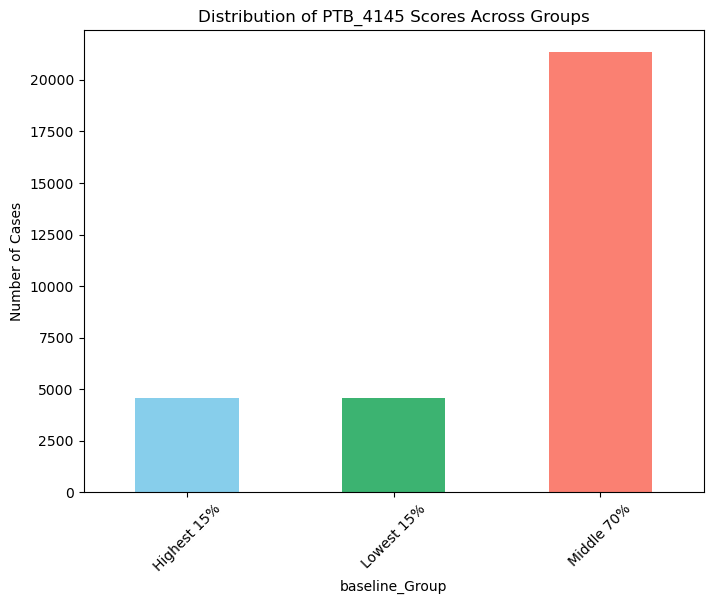

Lowest 15% Value Range: 1.0 to 4.0
Middle 70% Value Range: 4.0 to 8.0
Highest 15% Value Range: 8.0 to 10.0


In [ ]:
############################### UCLA tertile with same number of cases inthree group #############################
# Sort 'df' by 'ptb_4145' to ensure we can accurately pick the top and bottom 15%
df_sorted = df.sort_values(by='ptb_4145')

# Calculate the number of cases for each group
total_cases = len(df_sorted)
cases_15_percent = int(np.floor(total_cases * 0.15))  # Number of cases for 15%

# Assign groups
df_sorted['baseline_Group'] = 'Middle 70%'  # Default to middle
df_sorted.iloc[:cases_15_percent, df_sorted.columns.get_loc('baseline_Group')] = 'Lowest 15%'  # Bottom 15%
df_sorted.iloc[-cases_15_percent:, df_sorted.columns.get_loc('baseline_Group')] = 'Highest 15%'  # Top 15%

# Now, 'df_sorted' has a 'Group' column with the correct categorization

# Verify the distribution across the groups
group_counts = df_sorted['baseline_Group'].value_counts().sort_index()
print(group_counts)

# Plotting the result
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['skyblue', 'mediumseagreen', 'salmon'])
plt.title('Distribution of PTB_4145 Scores Across Groups')
plt.xlabel('baseline_Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()


# Determine the min and max 'V00PASE' values in each group
lowest_15_min_max = df_sorted[df_sorted['baseline_Group'] == 'Lowest 15%']['ptb_4145'].agg(['min', 'max'])
middle_70_min_max = df_sorted[df_sorted['baseline_Group'] == 'Middle 70%']['ptb_4145'].agg(['min', 'max'])
highest_15_min_max = df_sorted[df_sorted['baseline_Group'] == 'Highest 15%']['ptb_4145'].agg(['min', 'max'])

# Display the value ranges for each group
print(f"Lowest 15% Value Range: {lowest_15_min_max['min']} to {lowest_15_min_max['max']}")
print(f"Middle 70% Value Range: {middle_70_min_max['min']} to {middle_70_min_max['max']}")
print(f"Highest 15% Value Range: {highest_15_min_max['min']} to {highest_15_min_max['max']}")



##### Follow-up

followup_Group
Highest 15%     4572
Lowest 15%      4572
Middle 70%     21340
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/3785070221.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sorted['followup_Group'] = 'Middle 70%'  # Default to middle


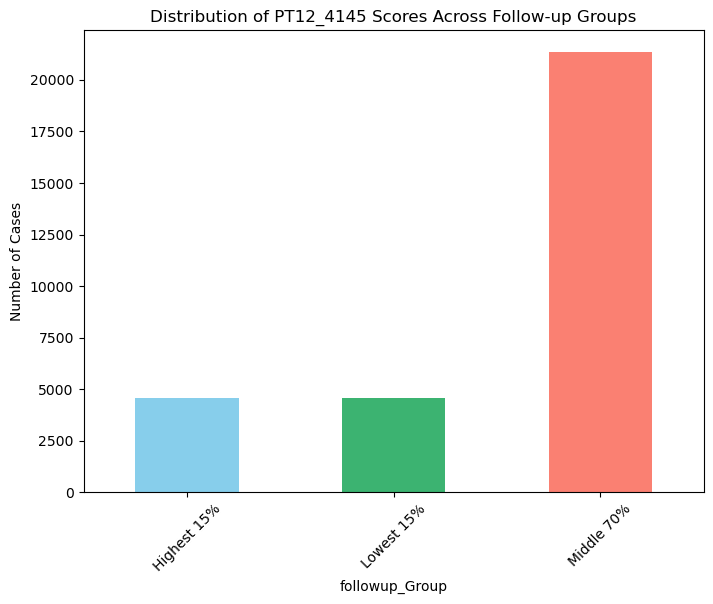

Lowest 15% Value Range: 1.0 to 4.0
Middle 70% Value Range: 4.0 to 8.0
Highest 15% Value Range: 8.0 to 10.0


In [ ]:
# Now, sort 'df_sorted' by 'pt12_4145' for the new group categorization
df_sorted = df_sorted.sort_values(by='pt12_4145')

# Calculate the number of cases for the new grouping based on 'pt12_4145'
total_cases_followup = len(df_sorted)
cases_15_percent_followup = int(np.floor(total_cases_followup * 0.15))  # Number of cases for 15%

# Assign new groups to 'followup_Group' based on 'pt12_4145'
df_sorted['followup_Group'] = 'Middle 70%'  # Default to middle
df_sorted.iloc[:cases_15_percent_followup, df_sorted.columns.get_loc('followup_Group')] = 'Lowest 15%'  # Bottom 15%
df_sorted.iloc[-cases_15_percent_followup:, df_sorted.columns.get_loc('followup_Group')] = 'Highest 15%'  # Top 15%

# Verify the distribution across the new groups
group_counts_followup = df_sorted['followup_Group'].value_counts().sort_index()
print(group_counts_followup)

# Plotting the distribution of 'pt12_4145' scores across new groups
plt.figure(figsize=(8, 6))
group_counts_followup.plot(kind='bar', color=['skyblue', 'mediumseagreen', 'salmon'])
plt.title('Distribution of PT12_4145 Scores Across Follow-up Groups')
plt.xlabel('followup_Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

# Display the min and max 'pt12_4145' values in each follow-up group
lowest_15_min_max_followup = df_sorted[df_sorted['followup_Group'] == 'Lowest 15%']['pt12_4145'].agg(['min', 'max'])
middle_70_min_max_followup = df_sorted[df_sorted['followup_Group'] == 'Middle 70%']['pt12_4145'].agg(['min', 'max'])
highest_15_min_max_followup = df_sorted[df_sorted['followup_Group'] == 'Highest 15%']['pt12_4145'].agg(['min', 'max'])

# Print the value ranges for each follow-up group
print(f"Lowest 15% Value Range: {lowest_15_min_max_followup['min']} to {lowest_15_min_max_followup['max']}")
print(f"Middle 70% Value Range: {middle_70_min_max_followup['min']} to {middle_70_min_max_followup['max']}")
print(f"Highest 15% Value Range: {highest_15_min_max_followup['min']} to {highest_15_min_max_followup['max']}")


In [ ]:
df_sorted

,fysb_replyTime,fysb_3629,fysb_affiliationId,fysb_affiliation_samlet,fysb_organisation,fysb_region,age,gender,fysb_9344,fysb_9345,...,ptb_4145_quintiles,ptb_pt12_change,ptb_pt12_change_category,baseline_tertiles,followup_tertiles,baseline_tertiles_codes,followup_tertiles_codes,Activity_Change,baseline_Group,followup_Group
29863,2018-01-23 13:10:47,2018-01-23,342070,342070,2.0,2.0,48,2,72.0,161.0,...,2,-5.0,Decrease,Moderate,Low,1,0,Decreased,Middle 70%,Lowest 15%
48330,2020-01-10 07:19:27,2020-01-10,18936,18936,3.0,1.0,55,2,78.0,179.0,...,0,-3.0,Decrease,Low,Low,0,0,No Change,Lowest 15%,Lowest 15%
34290,2018-08-15 12:01:37,2018-08-15,22652,22652,2.0,2.0,61,1,113.0,177.0,...,0,-3.0,Decrease,Low,Low,0,0,No Change,Lowest 15%,Lowest 15%
48848,2020-01-23 14:57:39,2020-01-23,13566,13566,3.0,3.0,60,1,109.0,185.0,...,0,-3.0,Decrease,Low,Low,0,0,No Change,Lowest 15%,Lowest 15%
36451,2018-10-09 13:13:32,2018-10-09,22684,22684,3.0,4.0,70,1,71.0,172.0,...,2,-5.0,Decrease,Moderate,Low,1,0,Decreased,Middle 70%,Lowest 15%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45915,2019-09-30 09:54:40,2019-09-30,16380,16380,2.0,2.0,59,2,68.0,173.0,...,2,4.0,Increase,Moderate,High,1,2,Increased,Middle 70%,Highest 15%
35038,2018-08-29 15:33:27,2018-08-29,19974,19974,3.0,2.0,65,2,100.0,168.0,...,0,6.0,Increase,Low,High,0,2,Increased,Lowest 15%,Highest 15%
455,2013-10-14 12:43:51,2013-10-14,13564,13564,3.0,4.0,62,1,95.0,183.0,...,1,5.0,Increase,Moderate,High,1,2,Increased,Middle 70%,Highest 15%
37575,2018-11-12 17:24:24,2018-11-12,342062,342062,3.0,3.0,62,2,95.0,178.0,...,4,1.0,Increase,High,High,2,2,No Change,Highest 15%,Highest 15%


##### Increase / Decrease

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/2229042078.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sorted['Group_numeric'] = df_sorted['baseline_Group'].map(group_to_numeric)
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/2229042078.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sorted['Group_followup_numeric'] = df_sorted['followup_Group'].map(group_to_numeric)
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/2229042078.py:9: PerformanceWarning: DataFrame

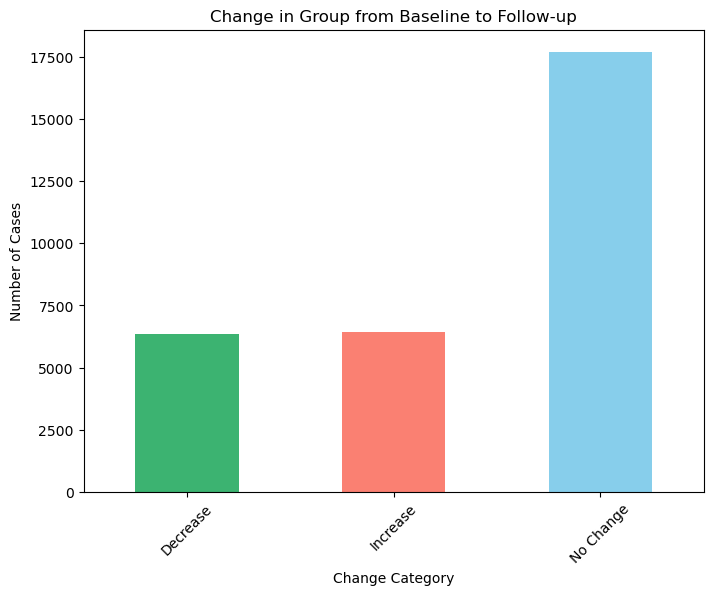

Change
Decrease      6345
Increase      6424
No Change    17715
Name: count, dtype: int64


In [ ]:
# Mapping groups to numeric values to facilitate comparison
group_to_numeric = {'Lowest 15%': 1, 'Middle 70%': 2, 'Highest 15%': 3}

# Convert 'Group' and 'followup_Group' to numeric values for comparison
df_sorted['Group_numeric'] = df_sorted['baseline_Group'].map(group_to_numeric)
df_sorted['Group_followup_numeric'] = df_sorted['followup_Group'].map(group_to_numeric)

# Determine the change direction: Increase, Decrease, or No Change
df_sorted['Change'] = df_sorted.apply(lambda row: 'Increase' if row['Group_followup_numeric'] > row['Group_numeric']
                                      else ('Decrease' if row['Group_followup_numeric'] < row['Group_numeric']
                                            else 'No Change'), axis=1)

# Count the occurrences of each change category
change_counts = df_sorted['Change'].value_counts().sort_index()

# Plotting the result
plt.figure(figsize=(8, 6))
change_counts.plot(kind='bar', color=['mediumseagreen', 'salmon', 'skyblue'])
plt.title('Change in Group from Baseline to Follow-up')
plt.xlabel('Change Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

# Optionally, display the counts
print(change_counts)


In [ ]:
df_sorted

,fysb_replyTime,fysb_3629,fysb_affiliationId,fysb_affiliation_samlet,fysb_organisation,fysb_region,age,gender,fysb_9344,fysb_9345,...,baseline_tertiles,followup_tertiles,baseline_tertiles_codes,followup_tertiles_codes,Activity_Change,baseline_Group,followup_Group,Group_numeric,Group_followup_numeric,Change
29863,2018-01-23 13:10:47,2018-01-23,342070,342070,2.0,2.0,48,2,72.0,161.0,...,Moderate,Low,1,0,Decreased,Middle 70%,Lowest 15%,2,1,Decrease
48330,2020-01-10 07:19:27,2020-01-10,18936,18936,3.0,1.0,55,2,78.0,179.0,...,Low,Low,0,0,No Change,Lowest 15%,Lowest 15%,1,1,No Change
34290,2018-08-15 12:01:37,2018-08-15,22652,22652,2.0,2.0,61,1,113.0,177.0,...,Low,Low,0,0,No Change,Lowest 15%,Lowest 15%,1,1,No Change
48848,2020-01-23 14:57:39,2020-01-23,13566,13566,3.0,3.0,60,1,109.0,185.0,...,Low,Low,0,0,No Change,Lowest 15%,Lowest 15%,1,1,No Change
36451,2018-10-09 13:13:32,2018-10-09,22684,22684,3.0,4.0,70,1,71.0,172.0,...,Moderate,Low,1,0,Decreased,Middle 70%,Lowest 15%,2,1,Decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45915,2019-09-30 09:54:40,2019-09-30,16380,16380,2.0,2.0,59,2,68.0,173.0,...,Moderate,High,1,2,Increased,Middle 70%,Highest 15%,2,3,Increase
35038,2018-08-29 15:33:27,2018-08-29,19974,19974,3.0,2.0,65,2,100.0,168.0,...,Low,High,0,2,Increased,Lowest 15%,Highest 15%,1,3,Increase
455,2013-10-14 12:43:51,2013-10-14,13564,13564,3.0,4.0,62,1,95.0,183.0,...,Moderate,High,1,2,Increased,Middle 70%,Highest 15%,2,3,Increase
37575,2018-11-12 17:24:24,2018-11-12,342062,342062,3.0,3.0,62,2,95.0,178.0,...,High,High,2,2,No Change,Highest 15%,Highest 15%,3,3,No Change


#### Tertile

##### Tertile UCLA

ptb_4145_Group
Middle 70%     0.639352
Lowest 15%     0.298812
Highest 15%    0.061836
Name: proportion, dtype: float64
ptb_4145_Group
Lowest 15%      9109
Middle 70%     19490
Highest 15%     1885
Name: count, dtype: int64


/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_56612/814561403.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ptb_4145_Group'] = pd.cut(df['ptb_4145'], bins=bins, labels=labels, include_lowest=True)


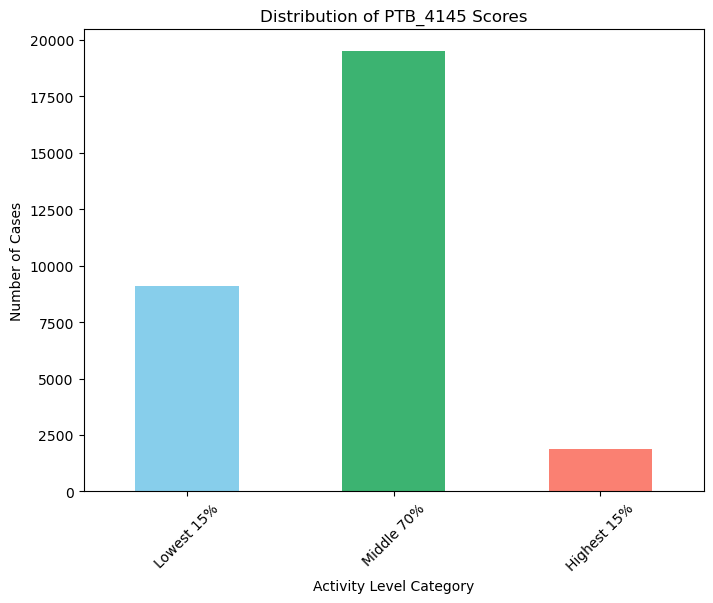

Lowest 15% Value Range: 1.0 to 4.0
Middle 70% Value Range: 4.0 to 8.0
Highest 15% Value Range: 8.0 to 10.0


In [ ]:
# Calculate quantiles to find the thresholds for the lowest 15%, highest 15%, and the middle 70%
quantiles = df['ptb_4145'].quantile([0.15, 0.85])

# Use pd.cut to categorize the subjects based on the calculated quantiles
# We define explicit bins to ensure that the top 15% and bottom 15% are captured correctly, with the rest being the middle 70%
bins = [df['ptb_4145'].min(), quantiles[0.15], quantiles[0.85], df['ptb_4145'].max()]
labels = ['Lowest 15%', 'Middle 70%', 'Highest 15%']
df['ptb_4145_Group'] = pd.cut(df['ptb_4145'], bins=bins, labels=labels, include_lowest=True)

# Display the distribution of subjects across the groups
print(df['ptb_4145_Group'].value_counts(normalize=True))  # This will show the proportion of each group

# Count the number of cases in each group
group_counts = df['ptb_4145_Group'].value_counts()

# Sort the index to ensure the plot is ordered correctly
group_counts = group_counts.sort_index()

# Print the number of cases in each group
print(group_counts)

# Create the plot
plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['skyblue', 'mediumseagreen', 'salmon'])

plt.title('Distribution of PTB_4145 Scores')
plt.xlabel('Activity Level Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)

# Show the plot
plt.show()



# Extract the bins array used in pd.cut
bins = [df['ptb_4145'].min(), quantiles[0.15], quantiles[0.85], df['ptb_4145'].max()]

# Display the value ranges for each group
print(f"Lowest 15% Value Range: {bins[0]} to {bins[1]}")
print(f"Middle 70% Value Range: {bins[1]} to {bins[2]}")
print(f"Highest 15% Value Range: {bins[2]} to {bins[3]}")



##### Tertile with same number of cases inthree group in UCLA